# Time Series Analysis

### This script contains the following points:
1. Importing libraries and modules
2. Importing data
3. Subsetting the data
4. Creating a line chart of data
5. Decompose the data's components and discuss
6. Conduct Dickey-Fuller test to test for stationarity
7. If not stationary, conduct differencing on data and repeat step 6
8. Check autocorrelations

### 1. Importing libraries and modules

In [88]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [89]:
%matplotlib inline

### 2. Importing data

In [90]:
path = r'C:\Users\keely\Documents\Courses\CareerFoundry\Immersion\Achievement 6 - Advanced Analytics_Dashboard\2019-2021 CDC Natality'

In [91]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_flags.pkl'))

In [92]:
df.head()

,index,state,year,month,month_code,mother_ed,prenatal_start,births,birth_wt_avg,mother_age_avg,gest_age_avg,date,season,region,birth_wt_alert,gest_age_alert,mother_age_range,birth_wt_cat,gest_age_cat
0,0,Alabama,2019,January,1,high school GED or less,10,34,3223.149902,27.440001,38.820000,2019-01-01,Winter,South,NBW,not preterm,26-28,average,old
1,1,Alabama,2019,January,1,high school GED or less,2,30,3482.770020,29.930000,39.070000,2019-01-01,Winter,South,NBW,not preterm,28-30,highest,oldest
2,2,Alabama,2019,January,1,high school GED or less,3,25,3251.959961,30.760000,38.639999,2019-01-01,Winter,South,NBW,not preterm,30-32,average,old
3,3,Alabama,2019,January,1,high school GED or less,4,25,3120.399902,28.639999,38.119999,2019-01-01,Winter,South,NBW,not preterm,28-30,low,young
4,4,Alabama,2019,January,1,high school GED or less,5,12,2938.080078,27.920000,37.500000,2019-01-01,Winter,South,NBW,not preterm,26-28,lowest,youngest


In [93]:
df.shape

(86437, 19)

### 3. Subsetting the data & creating line charts

#### a) Births over time

In [94]:
df_births = df[['date','births']]

In [95]:
df_births.head()

,date,births
0,2019-01-01,34
1,2019-01-01,30
2,2019-01-01,25
3,2019-01-01,25
4,2019-01-01,12


In [96]:
df_births.shape

(86437, 2)

In [97]:
df_births = df.groupby('date').agg({'births': ['sum']})

In [98]:
df_births.head()

,births
,sum
date,
2019-01-01,303611
2019-02-01,272983
2019-03-01,297240
2019-04-01,291917
2019-05-01,309264


In [99]:
df_births.shape

(36, 1)

In [100]:
# It appears that after using the groupby function, the date was automatically reset as the index of the column. 

print(df_births.index)

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', name='date', freq=None)


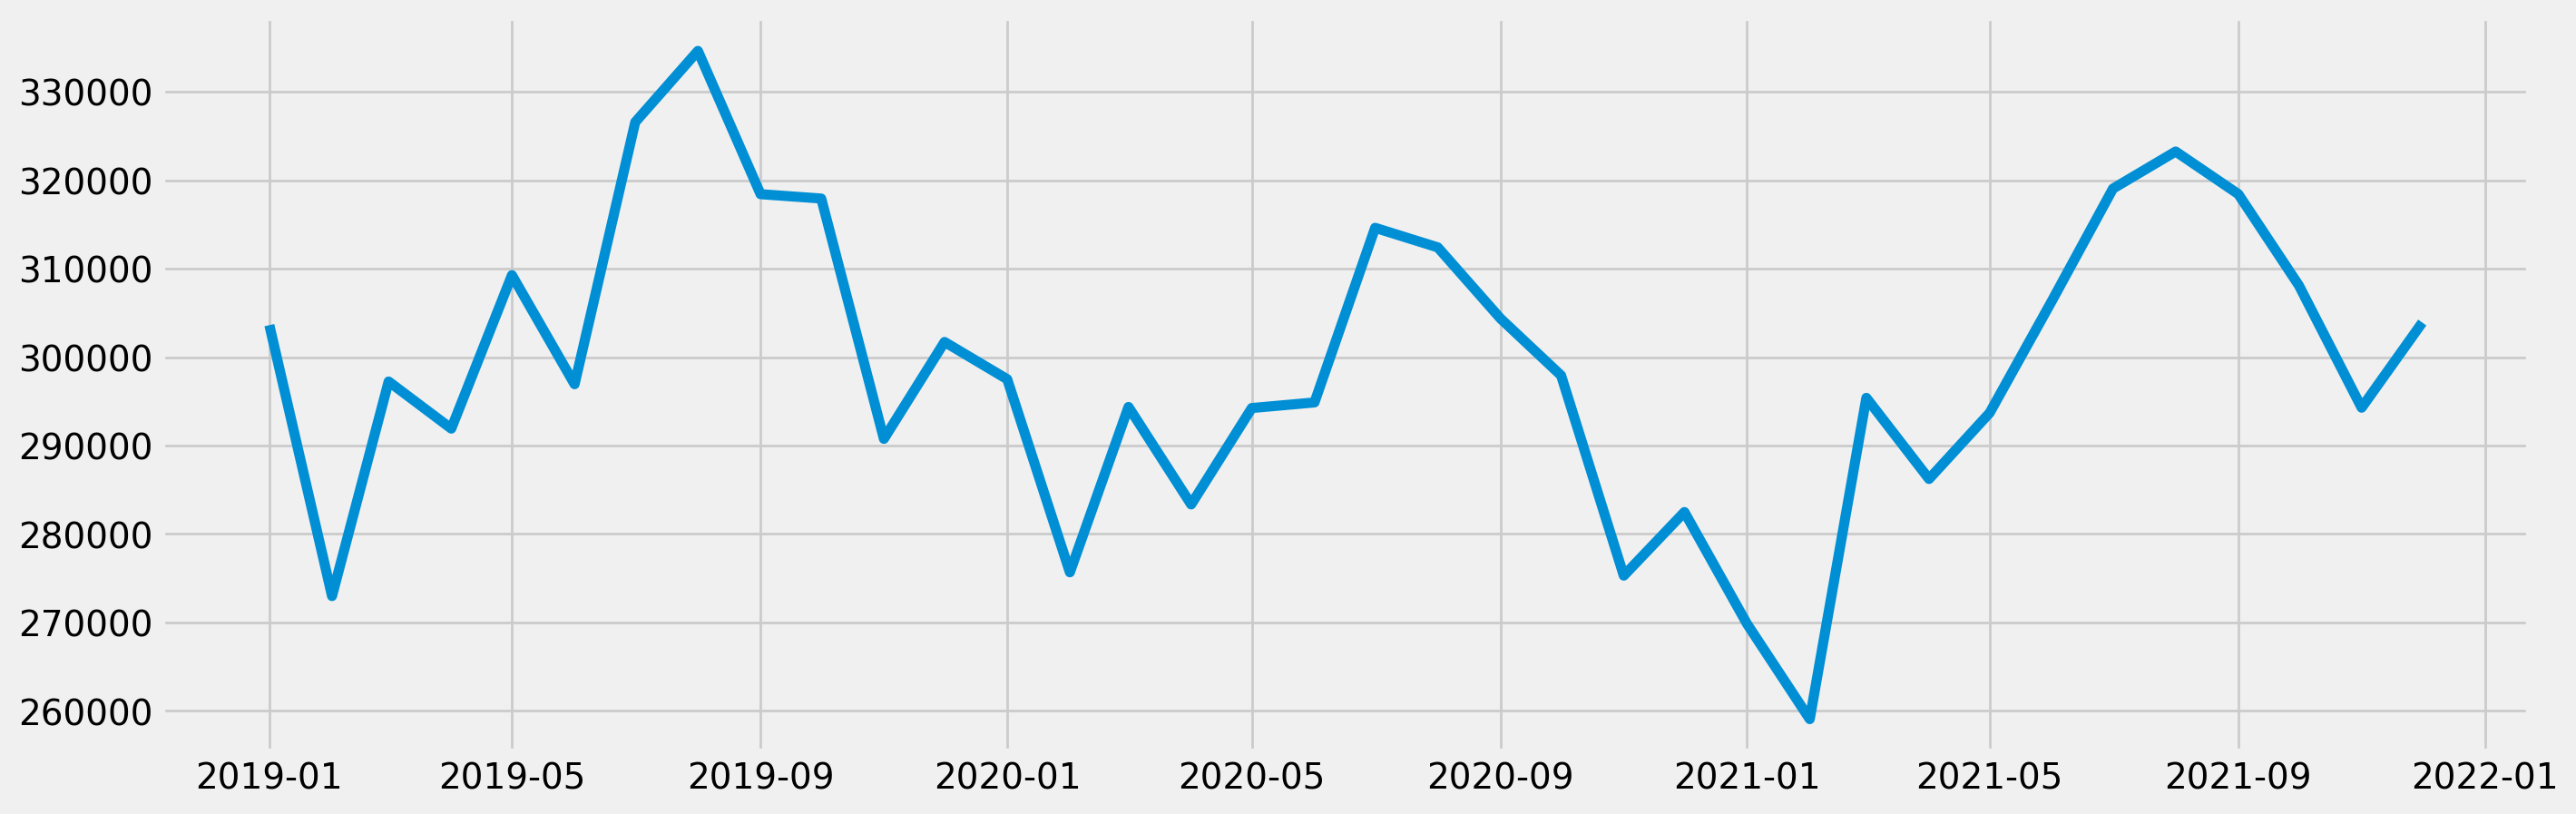

In [101]:
plt.figure(figsize=(15,5), dpi=200)
births_1 = plt.plot(df_births)

In [102]:
# Check for missing values.

df_births.isnull().sum() 

births  sum    0
dtype: int64

In [103]:
# Check for duplicates

dups = df_births.duplicated()
dups.sum()

# No dups!

0

In [104]:
df_births.dtypes

births  sum    int32
dtype: object

#### b) Weighted average birth weights over time

In [105]:
birth_wt = df[['date','birth_wt_avg','births']]
birth_wt.head()

,date,birth_wt_avg,births
0,2019-01-01,3223.149902,34
1,2019-01-01,3482.770020,30
2,2019-01-01,3251.959961,25
3,2019-01-01,3120.399902,25
4,2019-01-01,2938.080078,12


In [106]:
# Creating a data frame with weighted averages of mother age by date.

birthwt_grouped = birth_wt.groupby('date')
def wavg_birthwt(group):
    d = group['birth_wt_avg']
    w = group['births']
    return(d*w).sum()/w.sum()

birthwt_grouped.apply(wavg_birthwt)

date
2019-01-01    3253.213785
2019-02-01    3257.004434
2019-03-01    3256.708779
2019-04-01    3261.906393
2019-05-01    3261.654335
2019-06-01    3256.905030
2019-07-01    3257.591335
2019-08-01    3257.425637
2019-09-01    3260.671521
2019-10-01    3252.607928
2019-11-01    3244.266029
2019-12-01    3242.180008
2020-01-01    3242.120651
2020-02-01    3247.038495
2020-03-01    3253.999629
2020-04-01    3260.979194
2020-05-01    3266.600763
2020-06-01    3262.597475
2020-07-01    3256.451969
2020-08-01    3261.578312
2020-09-01    3264.242436
2020-10-01    3255.917810
2020-11-01    3256.694920
2020-12-01    3249.820732
2021-01-01    3244.763522
2021-02-01    3254.922278
2021-03-01    3261.608048
2021-04-01    3258.637926
2021-05-01    3257.228640
2021-06-01    3257.569399
2021-07-01    3252.034827
2021-08-01    3251.645013
2021-09-01    3251.128698
2021-10-01    3243.661829
2021-11-01    3243.317480
2021-12-01    3235.040189
dtype: float64

In [107]:
df_birthwt_wa = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'birth_wt_date_wa.csv'))

In [108]:
df_birthwt_wa.head()

,date,birth_wt_wa
0,1/1/2019,3253.213785
1,2/1/2019,3257.004434
2,3/1/2019,3256.708779
3,4/1/2019,3261.906393
4,5/1/2019,3261.654335


In [109]:
df_birthwt_wa.shape

(36, 2)

In [110]:
df_birthwt_wa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         36 non-null     object 
 1   birth_wt_wa  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [111]:
from datetime import datetime

df_birthwt_wa['datetime'] = pd.to_datetime(df_birthwt_wa['date']) # Create a datetime column from "Date.""
df_birthwt_wa = df_birthwt_wa.set_index('datetime') # Set the datetime as the index of the dataframe.
df_birthwt_wa.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_birthwt_wa.head()

,birth_wt_wa
datetime,
2019-01-01,3253.213785
2019-02-01,3257.004434
2019-03-01,3256.708779
2019-04-01,3261.906393
2019-05-01,3261.654335


In [112]:
df_birthwt_wa

,birth_wt_wa
datetime,
2019-01-01,3253.213785
2019-02-01,3257.004434
2019-03-01,3256.708779
2019-04-01,3261.906393
2019-05-01,3261.654335
2019-06-01,3256.905030
2019-07-01,3257.591335
2019-08-01,3257.425637
2019-09-01,3260.671521


(array([17897., 18017., 18140., 18262., 18383., 18506., 18628., 18748.,
        18871., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

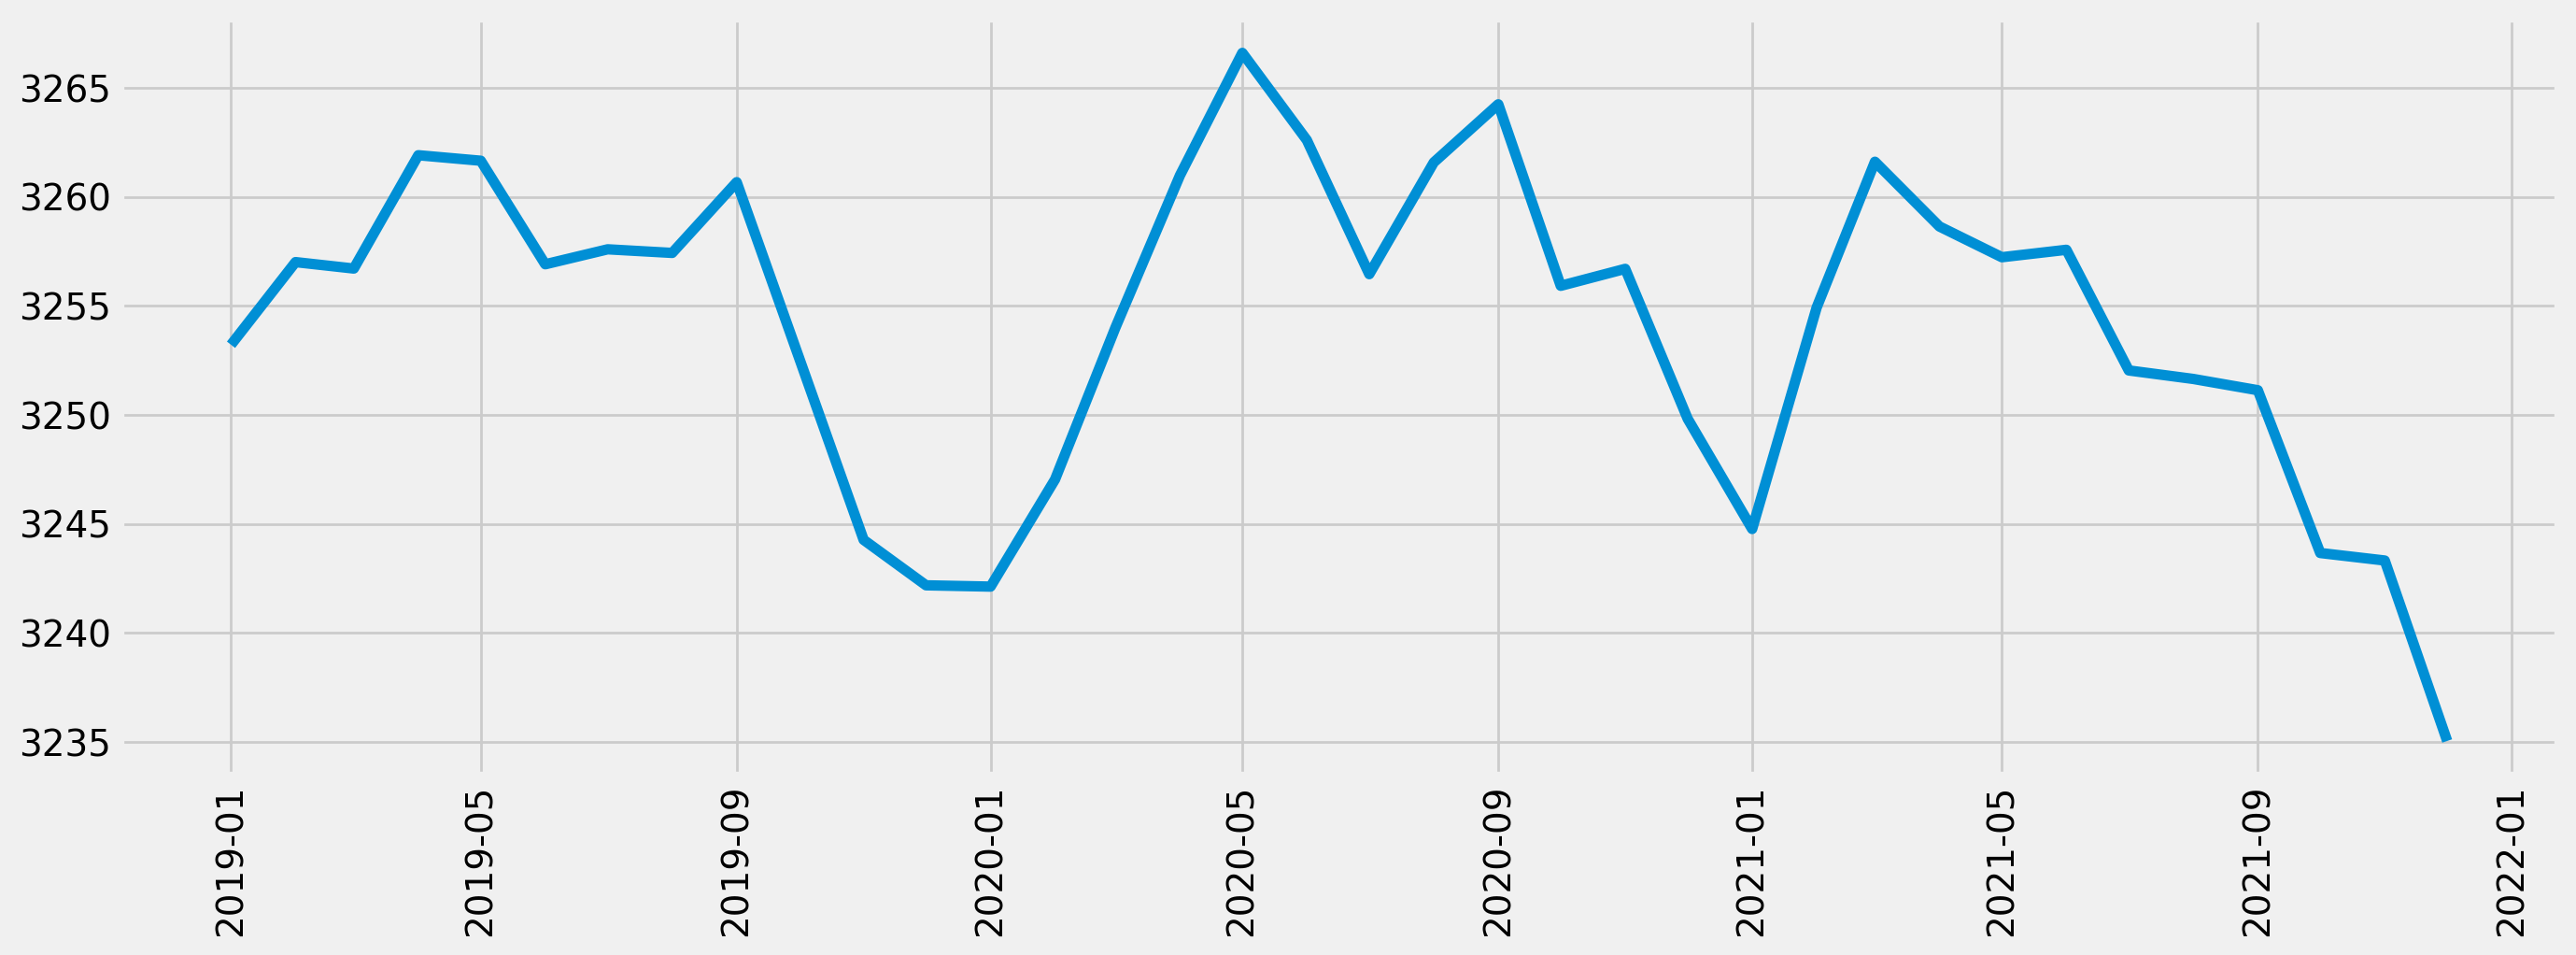

In [113]:
plt.figure(figsize=(15,5), dpi=200)
birth_wt_1 = plt.plot(df_birthwt_wa)
plt.xticks(rotation=90)

In [114]:
# Check for missing values.

df_birthwt_wa.isnull().sum() 

birth_wt_wa    0
dtype: int64

In [115]:
# Check for duplicates

dups_2 = df_birthwt_wa.duplicated()
dups_2.sum()

# No dups!

0

In [116]:
# Checking data type and making sure no mixed data types in numeric value.

df_birthwt_wa.dtypes

birth_wt_wa    float64
dtype: object

### 4. Decompose the data's components and discuss

#### a) Decomposition of births time series

In [117]:
# Decompose the time series using an additive model

decomposition_births = sm.tsa.seasonal_decompose(df_births, model='additive')

In [118]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

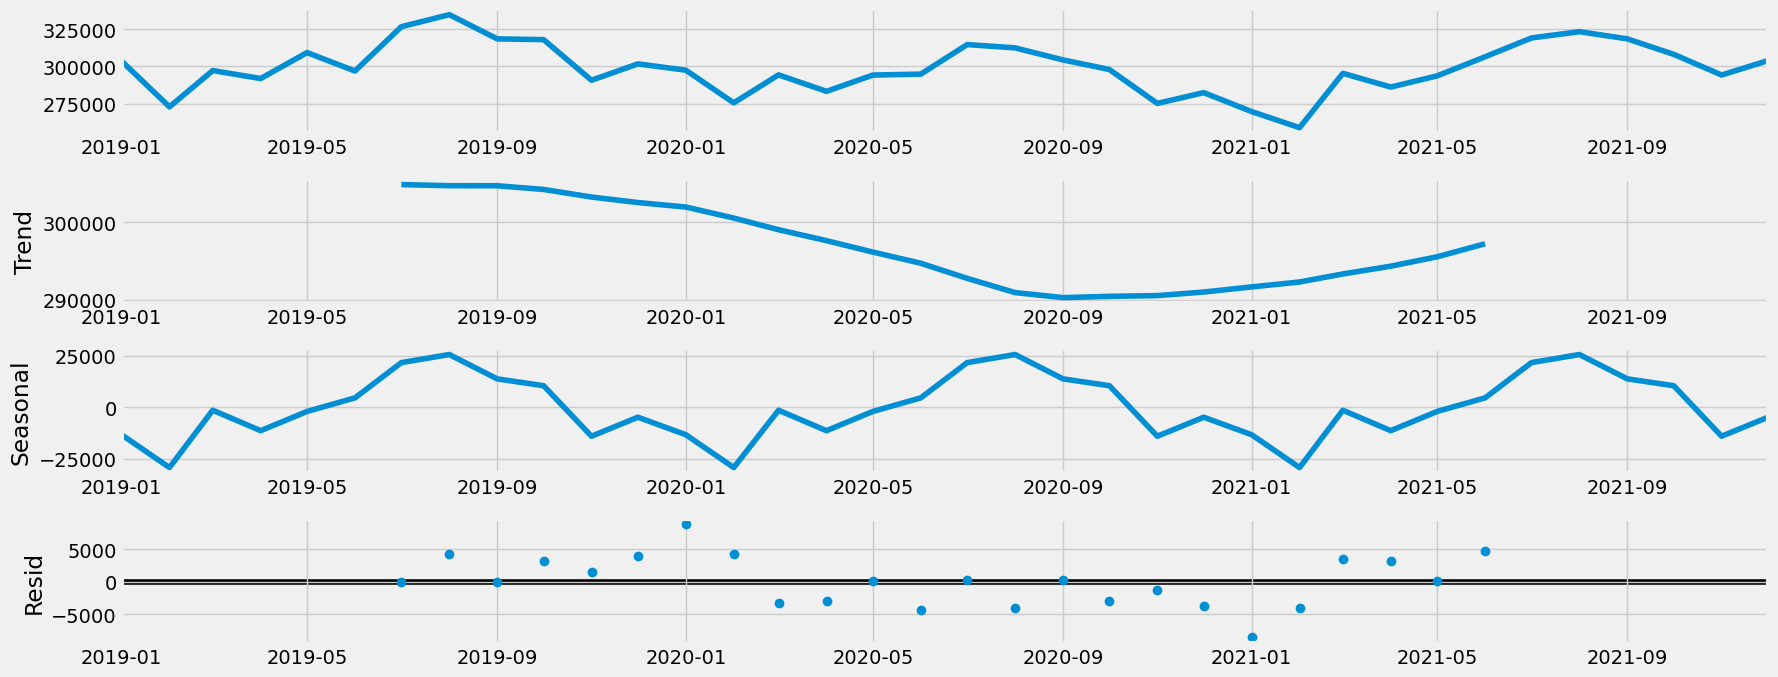

In [119]:
# Plot the separate components

decomposition_births.plot()
plt.show()

#### b) Decomposition of birth weight weighted average time series

In [120]:
decomposition_birthwt = sm.tsa.seasonal_decompose(df_birthwt_wa, model='additive')

In [121]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

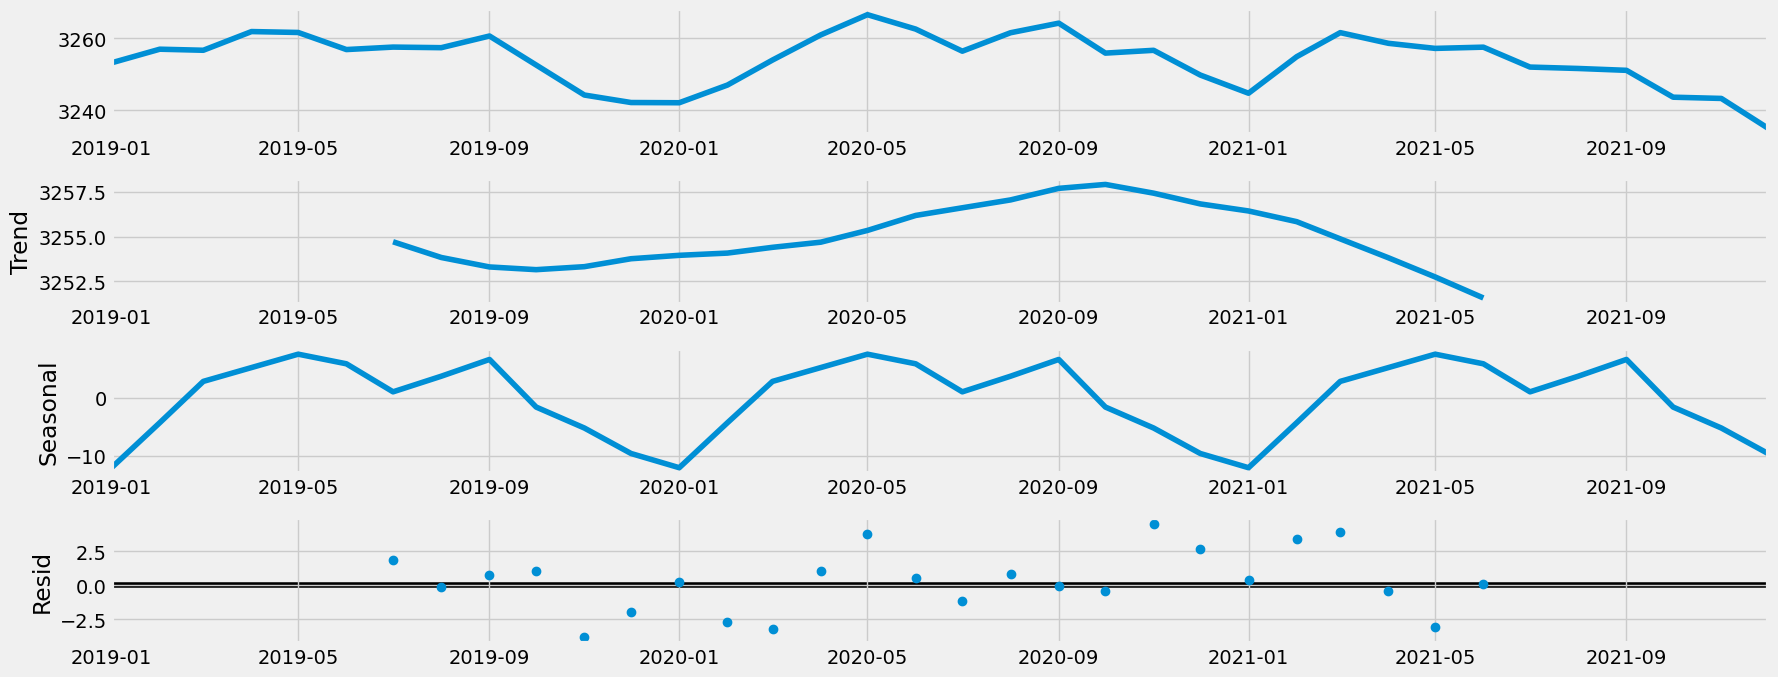

In [122]:
# Plot the separate components

decomposition_birthwt.plot()
plt.show()

In [123]:
df_birthwt_wa.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2019-01-01 to 2021-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   birth_wt_wa  36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


### 5. Conduct Dickey-Fuller test to test for stationarity

#### a) Stationarity & autocorrelation tests for births over time

In [124]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_births['births'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.376078
p-value                         0.011802
Number of Lags Used             3.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


According to the Dickey-Fuller test, this data is stationary. 

The test statistic, -3.377 is smaller than the critical value at 5% which is -2.96, meaning we can reject the null. 

This means the data of the sum of births by month over three years is stationary.

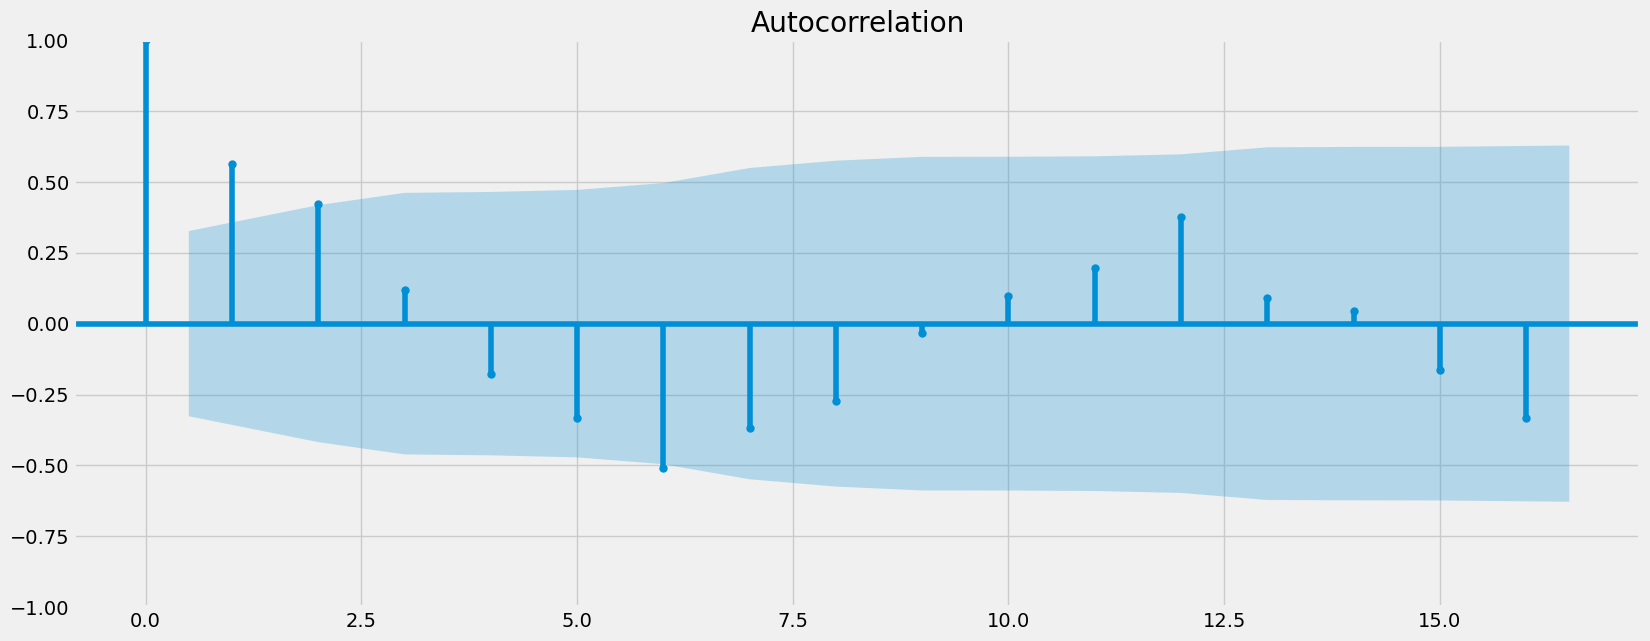

In [125]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_births)
plt.show()

There are less than 10 lines that rise above the blue shaded confidence interval region, meaning our data is not sigificantly autocorrelated.

#### b) Stationarity & autocorrelation tests for birth weight weighted averages over time

In [126]:
dickey_fuller(df_birthwt_wa['birth_wt_wa'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.011375
p-value                         0.281608
Number of Lags Used             1.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


In [127]:
# Later in the analysis, we learned that the birth weight weighted average data set has seasonality, so this is an 
# analyis better suited for data sets with seasonality.

from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_birthwt_wa.birth_wt_wa, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.0113752698570253
2. P-Value :  0.28160782044724575
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 34
5. Critical Values :
	 1% :  -3.639224104416853
	 5% :  -2.9512301791166293
	 10% :  -2.614446989619377


According to the Dickey-Fuller test, this data is non-stationary.

The test statistic of -2.01 is greater than the critical value at 5%, which is -2.95, meaning we cannot reject the null.

This means the data of birth weight weighted averages over time is non-stationary.

Also, after performing the adfuller test designed for seasonlity, we see a high p value, indicating non-stationary data.

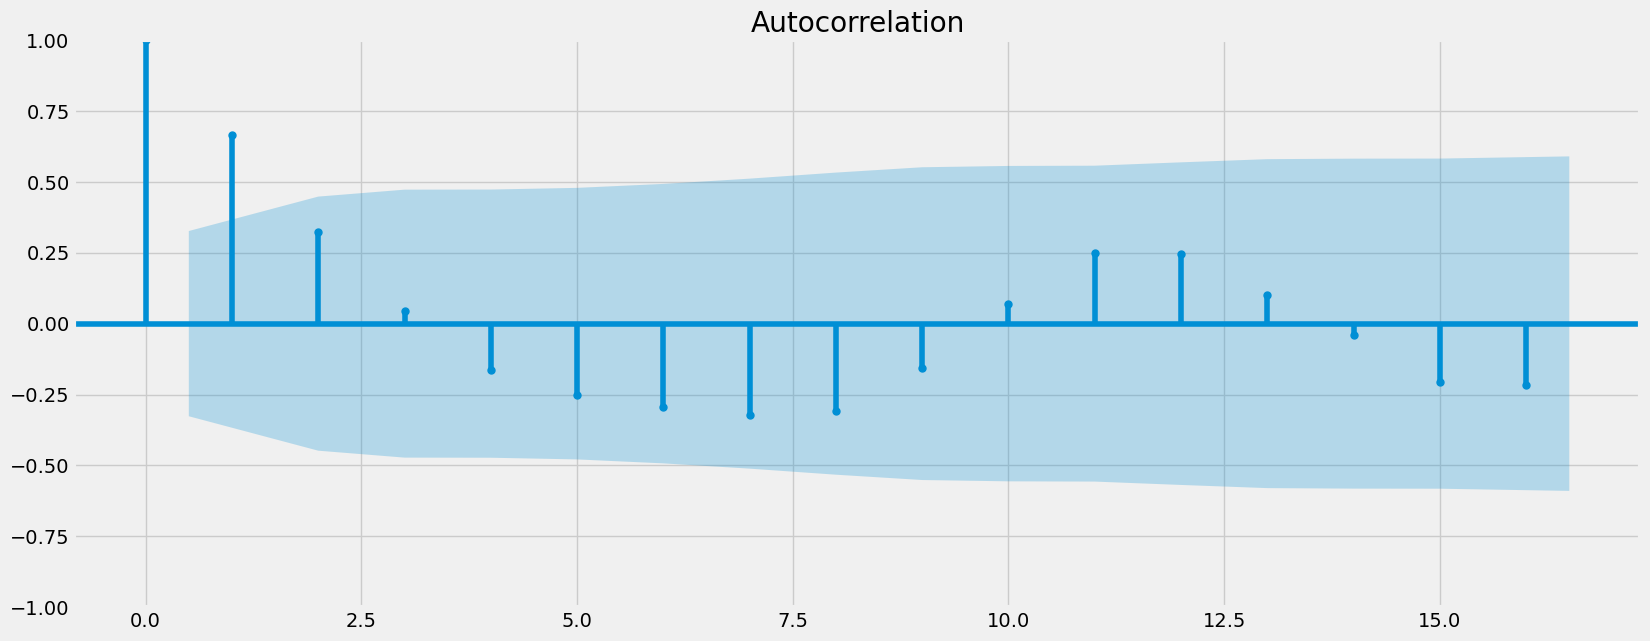

In [128]:
# Check out a plot of autocorrelations

plot_acf(df_birthwt_wa)
plt.show()

Because there are so few lines extending above the blue shaded confidence interval region, there is not siginicant autocorrelation in this data.

### 6. Differencing on non-stationary data

In this case, only the birth weight weighted averages over time were non-stationary, so differencing will only be done on this data set.

In [129]:
birthwt_diff = df_birthwt_wa - df_birthwt_wa.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [130]:
birthwt_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [131]:
birthwt_diff.head()

,birth_wt_wa
datetime,
2019-02-01,3.790649
2019-03-01,-0.295655
2019-04-01,5.197614
2019-05-01,-0.252058
2019-06-01,-4.749305


In [132]:
birthwt_diff.shape

(35, 1)

In [133]:
birthwt_diff.columns

Index(['birth_wt_wa'], dtype='object')

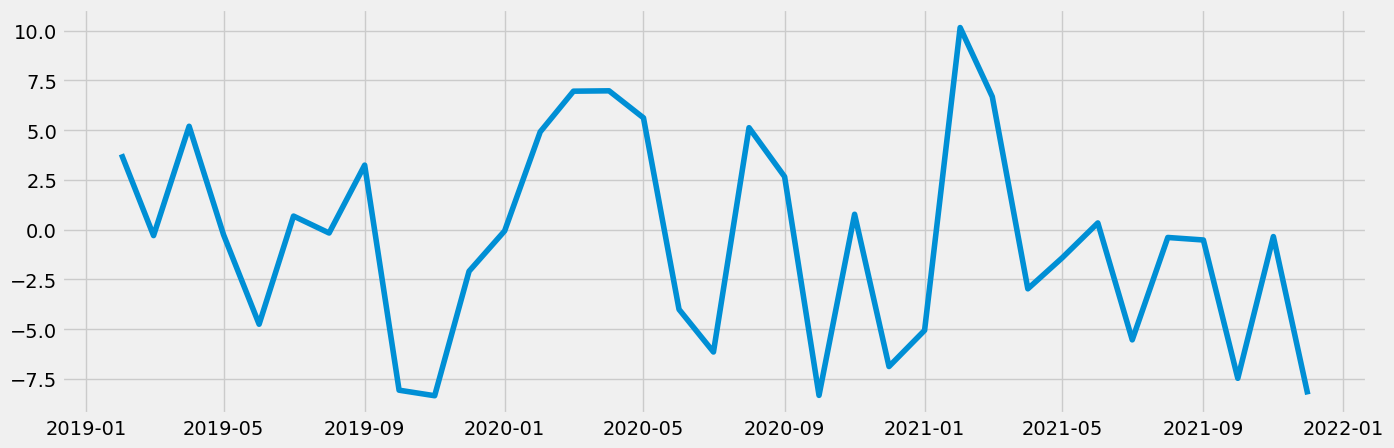

In [134]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(birthwt_diff)

In [135]:
dickey_fuller(birthwt_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.410984
p-value                         0.010590
Number of Lags Used             3.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


Here, the test statistic is smaller than the critical value at 5%, meaning we can reject the null stating that there is a unit root.

This means that the birth weight weighted averages over time data set after differencing is stationary.

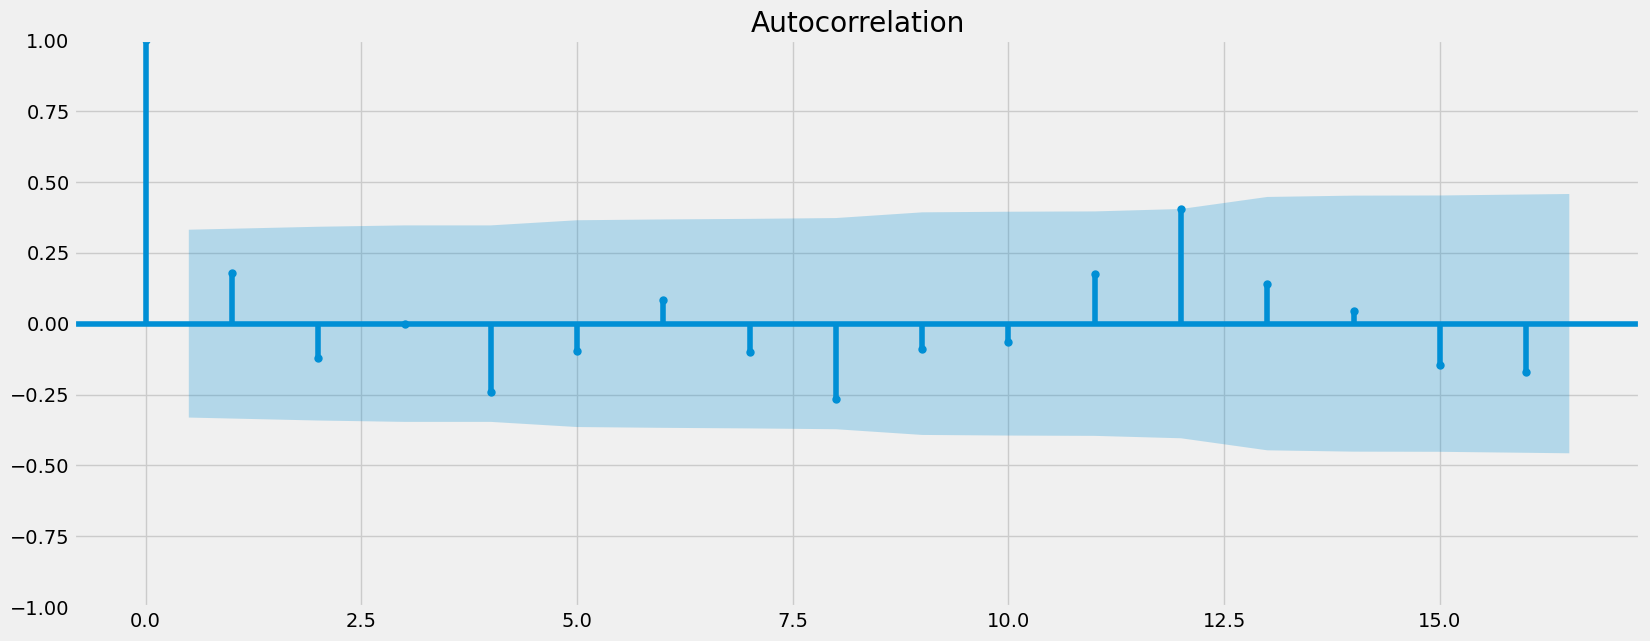

In [136]:
plot_acf(birthwt_diff)
plt.show()

The autocorrelation plot shows there is no sigificant autocorrelation and futher reinforces the stationarity of the data after differencing.